# 🌟 Cryptocurrency Volatility Prediction and Portfolio Strategy 📈

---

## 🚀 Project Overview

This notebook focuses on the analysis, prediction, and optimization of cryptocurrency market behavior.  
 Here's the roadmap:

---

### **1️⃣ Data Collection**: 📊 **Scraping Cryptocurrency Data** 
We begin by **scraping price data** for cryptocurrencies from **Yahoo Finance** to build our dataset. For this purpose, we’ll use the **BeautifulSoup** library to efficiently extract and organize the data. The cryptocurrencies we will focus on are:
- **Bitcoin (BTC)** 🪙
- **Ethereum (ETH)** 🔷
- **Litecoin (LTC)** 💡
---

### **2️⃣ Volatility Prediction**: 🤖 **Optimized Neural Networks**
Harnessing the power of **machine learning**, we'll predict cryptocurrency volatility with a cutting-edge approach:
- Craft **custom features** to better understand market dynamics.
- Compare and optimize **neural network architectures** to find the most effective model for volatility prediction.

---

### **3️⃣ Portfolio Strategy Development**: 💼 **Smart Investments**
With volatility insights in hand, we'll develop and evaluate portfolio strategies, such as:
- **Risk Parity** allocation and other advanced techniques.
- Perform a side-by-side comparison of these strategies to identify the **optimal approach**.

---

### **4️⃣ Object-Oriented Design**: 🛠️ **Python-Powered**
All components will be designed using a **modular, package-oriented approach** in Python:
- Reusable **classes** and **objects** for clean, efficient, and scalable code.
- A focus on maintainable and professional software design.

---

## 🎯 Goals and Outcomes
- Build an **end-to-end cryptocurrency analysis pipeline**.
- Leverage **AI and neural networks** to predict market behavior.
- Construct and compare **portfolio allocation strategies** to maximize returns and manage risk effectively.

Let’s dive into the fascinating world of cryptocurrencies and uncover innovative solutions for navigating this ever-evolving market! 🌐✨

---


In [1]:
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from crypto_volatility_lab.data_construction import CryptoScraper, FeaturesCreator, TimeSeriesCreator
from crypto_volatility_lab.modeling import GRUPipeline, LSTMPipeline, LSTMGRUPipeline, TCNNPipeline
from crypto_volatility_lab.portfolio_optimization.portfolioConstructor import PortfolioConstructor

sys.path.append("crypto-volatility-lab")

In [2]:
# Important constants
currency_list = ['BTC-USD', 'ETH-USD', 'LTC-USD']
test_start_date = datetime.strptime('2024-01-01', "%Y-%m-%d")

### **1️⃣ Data Collection**: 📊 **Scraping Cryptocurrency Data** 

We will scrape historical data for **Bitcoin (BTC)**, **Ethereum (ETH)**, and **Litecoin (LTC)** from **Yahoo Finance**, covering all available history up to today.

The `CryptoScraper` simplifies fetching historical cryptocurrency data from Yahoo Finance. It automates data retrieval, cleaning, and structuring into a **Pandas DataFrame**, making it ready for analysis.


#### **Key Features**
1. **Customizable Date Range**:
   - `start_date`: Start of data collection (default: earliest available).
   - `end_date`: End of data collection (default: tomorrow).
2. **Flexible Setup**:
   - Uses `BeautifulSoup` for HTML parsing and `DEFAULT_HEADERS` to ensure smooth web requests.
3. **Clean Output**:
   - Returns structured data with parsed dates and numeric columns for prices and volume.

---

In [3]:
crypto_scraper = CryptoScraper()

In [4]:
bitcoin_data = crypto_scraper.get_data_for_currency('BTC-USD')
ethereum_data = crypto_scraper.get_data_for_currency('ETH-USD')
litecoin_data = crypto_scraper.get_data_for_currency('LTC-USD')

In [5]:
# Exemple de données
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj,Volume
0,2025-01-24,103925.56,106137.02,102773.84,105809.84,105809.84,80242245632
1,2025-01-23,103657.67,106820.33,101257.80,103960.17,103960.17,104104515428
2,2025-01-22,106136.38,106294.34,103360.27,103653.07,103653.07,53878181052
3,2025-01-21,102052.58,107180.92,100103.95,106146.27,106146.27,88733878242
4,2025-01-20,101083.75,109114.88,99471.36,102016.66,102016.66,126279678351


# Création des time series

In [6]:
ts_creator = TimeSeriesCreator(data=bitcoin_data, date_column_name='Date', value_column_name='Close')
bitcoin_data["Log Returns"] = ts_creator.create_log_return_time_series()
bitcoin_data["Volatility"] = ts_creator.create_volatility_time_series()

ts_creator = TimeSeriesCreator(data=ethereum_data, date_column_name='Date', value_column_name='Close')
ethereum_data["Log Returns"] = ts_creator.create_log_return_time_series()
ethereum_data["Volatility"] = ts_creator.create_volatility_time_series()

ts_creator = TimeSeriesCreator(data=litecoin_data, date_column_name='Date', value_column_name='Close')
litecoin_data["Log Returns"] = ts_creator.create_log_return_time_series()
litecoin_data["Volatility"] = ts_creator.create_volatility_time_series()

# Exemple de données
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj,Volume,Log Returns,Volatility
3782,2014-09-17,465.86,468.17,452.42,457.33,457.33,21056800,NaN,NaN
3781,2014-09-18,456.86,456.86,413.10,424.44,424.44,34483200,-0.074635,NaN
3780,2014-09-19,424.10,427.83,384.53,394.80,394.80,37919700,-0.072391,NaN
3779,2014-09-20,394.67,423.30,389.88,408.90,408.90,36863600,0.035091,NaN
3778,2014-09-21,408.08,412.43,393.18,398.82,398.82,26580100,-0.024960,NaN


In [7]:
print(bitcoin_data.shape)
bitcoin_data.dropna(inplace=True)
ethereum_data.dropna(inplace=True)
litecoin_data.dropna(inplace=True)
print(bitcoin_data.shape)

(3783, 9)
(3762, 9)


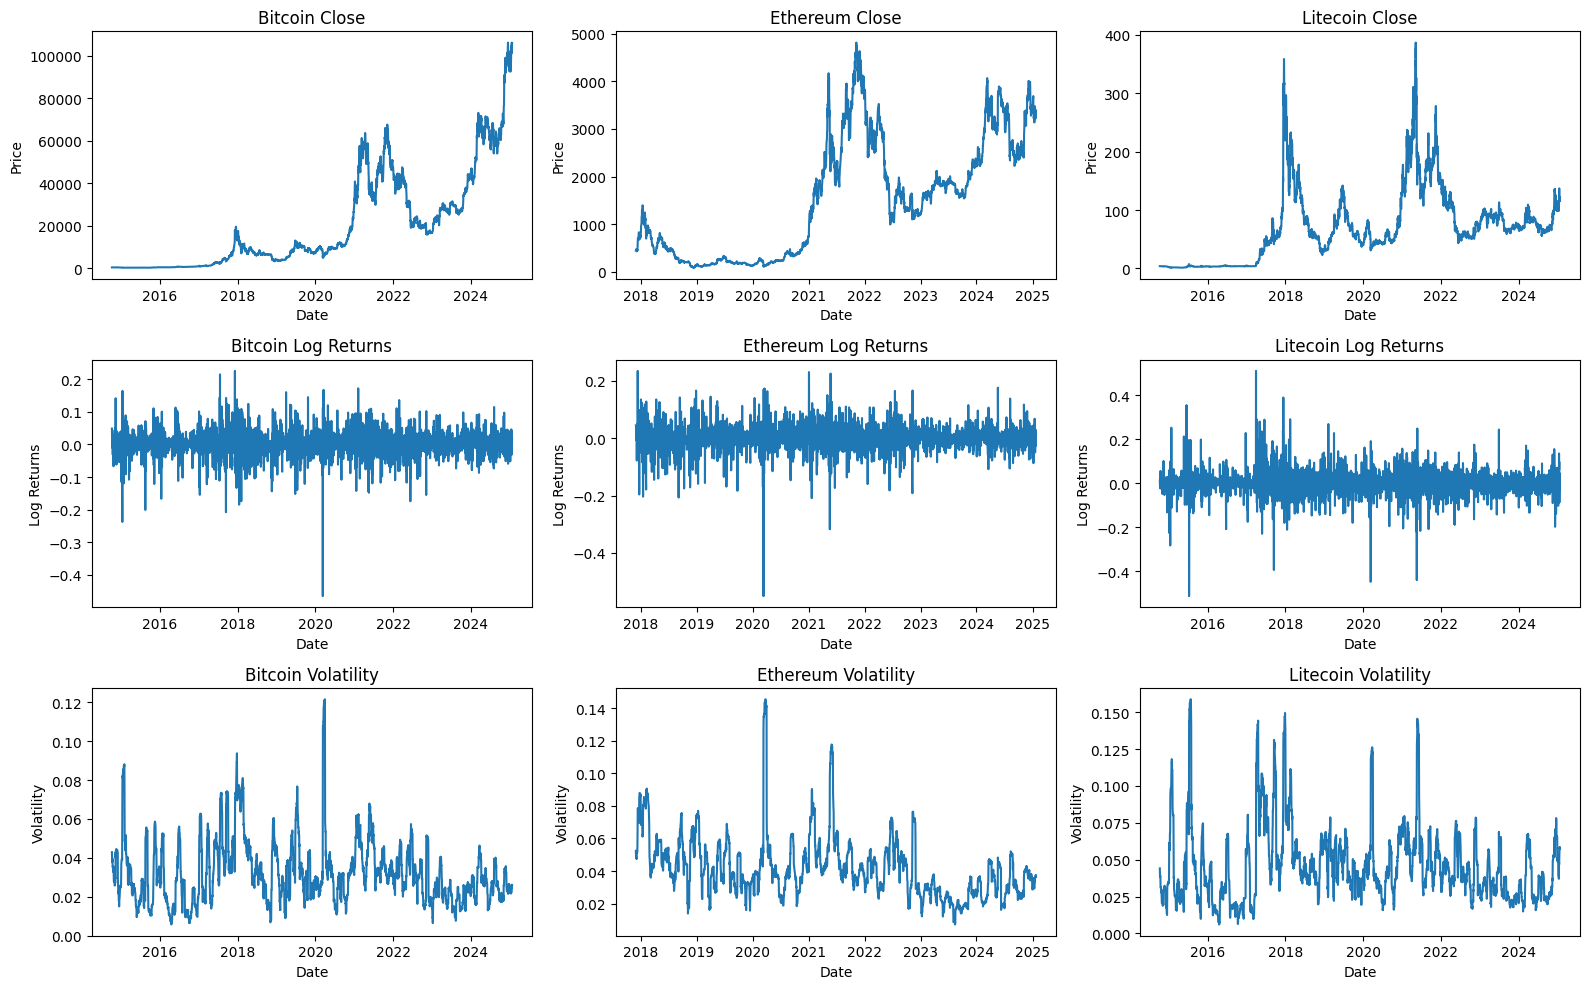

In [8]:
cryptos = [
    ("Bitcoin", bitcoin_data),
    ("Ethereum", ethereum_data),
    ("Litecoin", litecoin_data),
]

metrics = [
    ("Close", "Price"),
    ("Log Returns", "Log Returns"),
    ("Volatility", "Volatility"),
]

fig, ax = plt.subplots(len(metrics), len(cryptos), figsize=(16, 10))

for col, (crypto_name, crypto_data) in enumerate(cryptos):
    for row, (metric, ylabel) in enumerate(metrics):
        ax[row, col].plot(crypto_data["Date"], crypto_data[metric])
        ax[row, col].set_title(f"{crypto_name} {metric}")
        ax[row, col].set_xlabel("Date")
        ax[row, col].set_ylabel(ylabel)

plt.tight_layout()
plt.show()


# Feature engineering

In [9]:
features_creator_bitcoin = FeaturesCreator(data=bitcoin_data)
features_creator_ethereum = FeaturesCreator(data=ethereum_data)
features_creator_litecoin = FeaturesCreator(data=litecoin_data)

features_creator_bitcoin.create_all_features()
features_creator_ethereum.create_all_features()
features_creator_litecoin.create_all_features()

bitcoin_data = features_creator_bitcoin.transformed_data
ethereum_data = features_creator_ethereum.transformed_data
litecoin_data = features_creator_litecoin.transformed_data

features = features_creator_bitcoin.features_names

# Exemple de données
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj,Volume,Log Returns,Volatility,Weekly Volatility,Monthly Volatility,GARCH Volatility,Log Trading Range,Log Volume Change
3761,2014-10-08,336.12,354.36,327.19,352.94,352.94,54736300,0.048622,0.042931,0.042931,0.042931,0.034002,0.079772,NaN
3760,2014-10-09,352.75,382.73,347.69,365.03,365.03,83641104,0.033681,0.041557,0.042244,0.042244,0.034045,0.096019,0.424008
3759,2014-10-10,364.69,375.07,352.96,361.56,361.56,43665700,-0.009552,0.038797,0.041095,0.041095,0.032404,0.060758,-0.649972
3758,2014-10-11,361.36,367.19,355.95,362.30,362.30,13345200,0.002045,0.037781,0.040267,0.040267,0.030698,0.031089,-1.185406
3757,2014-10-12,362.61,379.43,356.14,378.55,378.55,17552800,0.043876,0.038999,0.040013,0.040013,0.032781,0.063346,0.274057


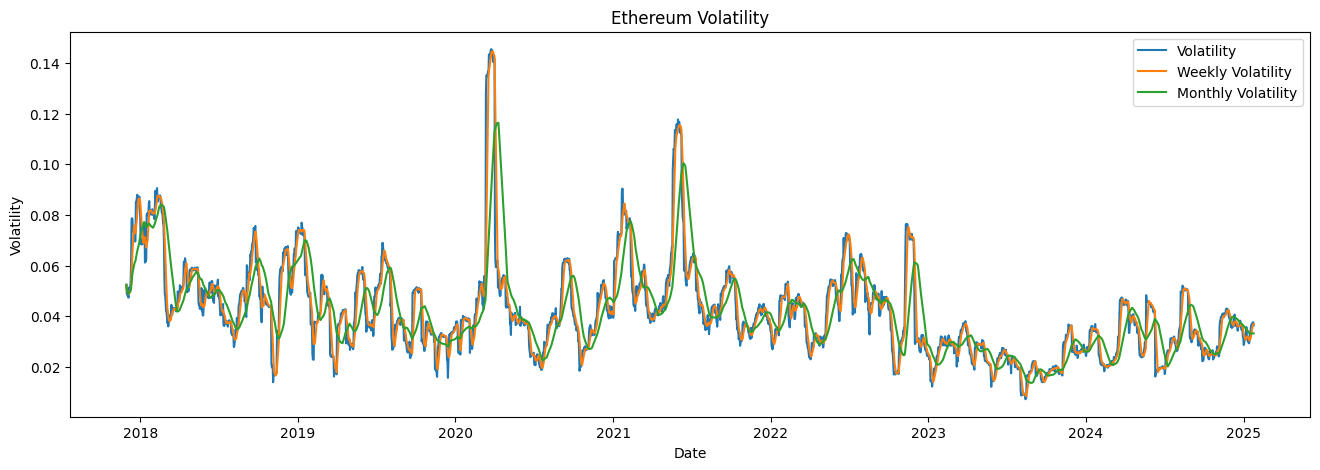

In [10]:
# plot volatility, weekly volatility, monthly volatility on the same plot
plt.figure(figsize=(16, 5))
plt.plot(ethereum_data["Date"], ethereum_data["Volatility"], label="Volatility")
plt.plot(ethereum_data["Date"], ethereum_data["Weekly Volatility"], label="Weekly Volatility")
plt.plot(ethereum_data["Date"], ethereum_data["Monthly Volatility"], label="Monthly Volatility")
plt.title("Ethereum Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

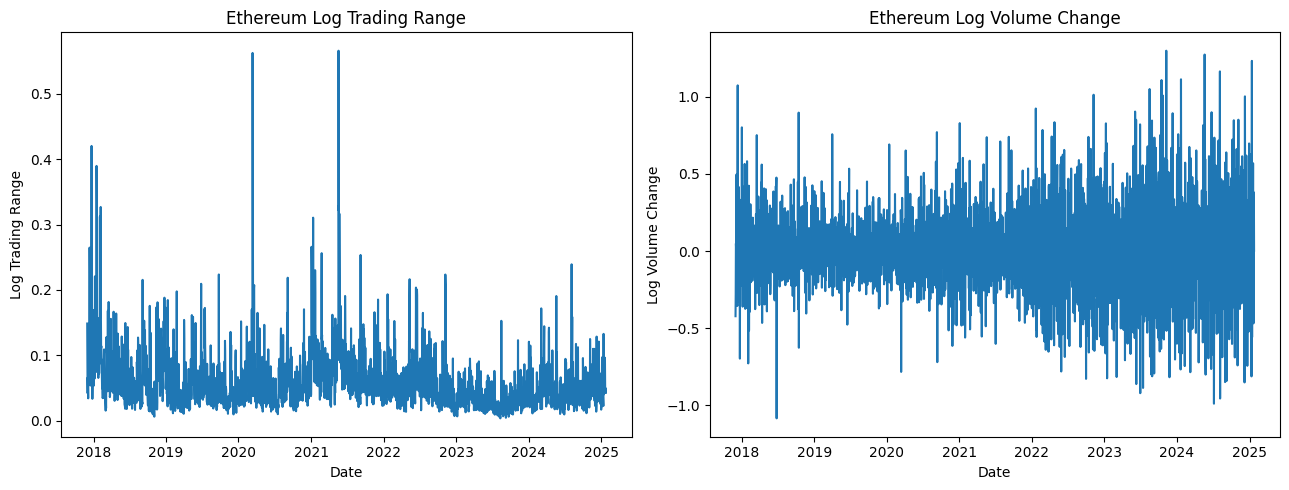

In [11]:
# plot log trading range and log volume change for bitcoin 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].plot(ethereum_data["Date"], ethereum_data["Log Trading Range"])
ax[0].set_title("Ethereum Log Trading Range")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Log Trading Range")
ax[1].plot(ethereum_data["Date"], ethereum_data["Log Volume Change"])
ax[1].set_title("Ethereum Log Volume Change")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Log Volume Change")
plt.tight_layout()
plt.show()

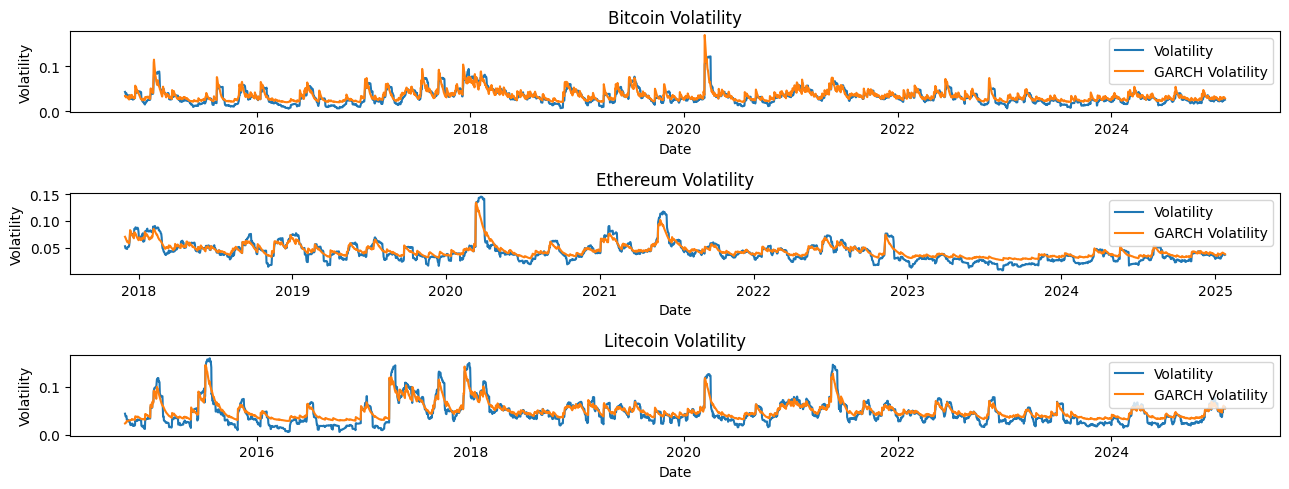

In [12]:
# plot garch volatility, realized volatility on the same plot for the 3 cryptocurrencies subplots
fig, ax = plt.subplots(3, 1, figsize=(13, 5))

ax[0].plot(bitcoin_data["Date"], bitcoin_data["Volatility"], label="Volatility")
ax[0].plot(bitcoin_data["Date"], bitcoin_data["GARCH Volatility"], label="GARCH Volatility")
ax[0].set_title("Bitcoin Volatility")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Volatility")
ax[0].legend()

ax[1].plot(ethereum_data["Date"], ethereum_data["Volatility"], label="Volatility")
ax[1].plot(ethereum_data["Date"], ethereum_data["GARCH Volatility"], label="GARCH Volatility")
ax[1].set_title("Ethereum Volatility")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Volatility")
ax[1].legend()

ax[2].plot(litecoin_data["Date"], litecoin_data["Volatility"], label="Volatility")
ax[2].plot(litecoin_data["Date"], litecoin_data["GARCH Volatility"], label="GARCH Volatility")
ax[2].set_title("Litecoin Volatility")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Volatility")
ax[2].legend()

plt.tight_layout()
plt.show()

# Train/test split

In [13]:
bitcoin_data.dropna(inplace=True)
ethereum_data.dropna(inplace=True)
litecoin_data.dropna(inplace=True)

In [14]:
bitcoin_train_data = bitcoin_data[bitcoin_data['Date'] < test_start_date]
bitcoin_test_data = bitcoin_data[bitcoin_data['Date'] >= test_start_date]

ethereum_train_data = ethereum_data[ethereum_data['Date'] < test_start_date]
ethereum_test_data = ethereum_data[ethereum_data['Date'] >= test_start_date]

litecoin_train_data = litecoin_data[litecoin_data['Date'] < test_start_date]
litecoin_test_data = litecoin_data[litecoin_data['Date'] >= test_start_date]

# check proportion of test data
print(f"Bitcoin test data proportion: {round(len(bitcoin_test_data) / len(bitcoin_data)*100, 2)}%")
print(f"Ethereum test data proportion: {round(len(ethereum_test_data) / len(ethereum_data)*100, 2)}%")
print(f"Litecoin test data proportion: {round(len(litecoin_test_data) / len(litecoin_data)*100, 2)}%")

Bitcoin test data proportion: 10.37%
Ethereum test data proportion: 14.93%
Litecoin test data proportion: 10.37%


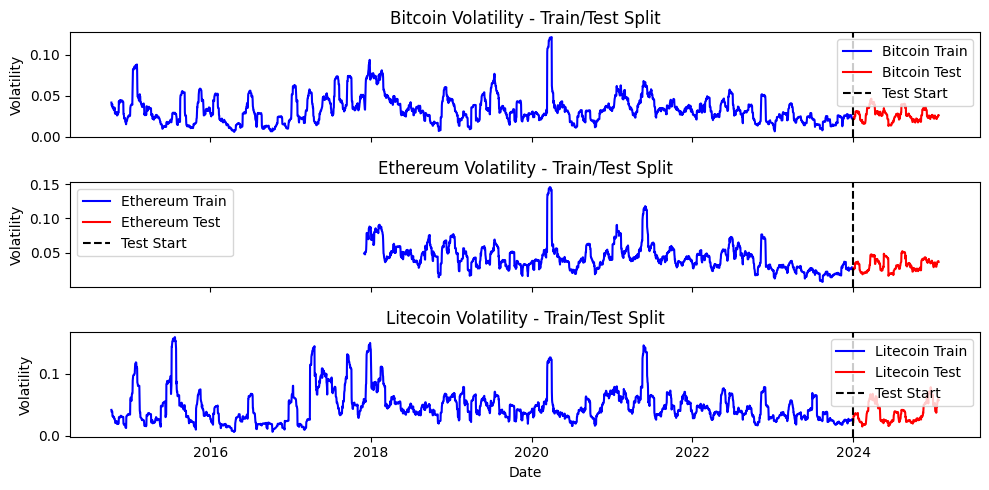

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5), sharex=True)
axs[0].plot(bitcoin_train_data["Date"], bitcoin_train_data["Volatility"], label="Bitcoin Train", color="blue")
axs[0].plot(bitcoin_test_data["Date"], bitcoin_test_data["Volatility"], label="Bitcoin Test", color="red")
axs[0].axvline(test_start_date, color="black", linestyle="--", label="Test Start")
axs[0].set_title("Bitcoin Volatility - Train/Test Split")
axs[0].set_ylabel("Volatility")
axs[0].legend()

axs[1].plot(ethereum_train_data["Date"], ethereum_train_data["Volatility"], label="Ethereum Train", color="blue")
axs[1].plot(ethereum_test_data["Date"], ethereum_test_data["Volatility"], label="Ethereum Test", color="red")
axs[1].axvline(test_start_date, color="black", linestyle="--", label="Test Start")
axs[1].set_title("Ethereum Volatility - Train/Test Split")
axs[1].set_ylabel("Volatility")
axs[1].legend()

axs[2].plot(litecoin_train_data["Date"], litecoin_train_data["Volatility"], label="Litecoin Train", color="blue")
axs[2].plot(litecoin_test_data["Date"], litecoin_test_data["Volatility"], label="Litecoin Test", color="red")
axs[2].axvline(test_start_date, color="black", linestyle="--", label="Test Start")
axs[2].set_title("Litecoin Volatility - Train/Test Split")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("Volatility")
axs[2].legend()

plt.tight_layout()
plt.show()

# Prédiction de la volatilité

In [16]:
features = features_creator_bitcoin.features_names
features

['Volatility',
 'Weekly Volatility',
 'Monthly Volatility',
 'GARCH Volatility',
 'Log Trading Range',
 'Log Volume Change']

In [17]:
# bitcoin model
bitcoin_pipeline = GRUPipeline(forecast_horizon=5, epochs=10, batch_size=32, validation_split=0.1, normalize=True, lookback=30)
bitcoin_model = bitcoin_pipeline.fit(bitcoin_train_data[features].values, bitcoin_train_data["Volatility"].values.astype(np.float64))

# ethereum model
ethereum_pipeline = GRUPipeline(forecast_horizon=5, epochs=10, batch_size=32, validation_split=0.1, dropout_rate=0, normalize=True, lookback=30)
ethereum_model= ethereum_pipeline.fit(ethereum_train_data[features].values, ethereum_train_data["Volatility"].values.astype(np.float64))

# litecoin model
litecoin_pipeline = GRUPipeline(forecast_horizon=5, epochs=10, batch_size=32, validation_split=0.1, normalize=True, lookback=30)
litecoin_model= litecoin_pipeline.fit(litecoin_train_data[features].values, litecoin_train_data["Volatility"].values.astype(np.float64))

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0218 - val_loss: 0.0014
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0042 - val_loss: 8.0939e-04
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0041 - val_loss: 8.1166e-04
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0040 - val_loss: 8.9831e-04
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0178 - val_loss: 0.0025
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0023 - val_loss: 0.0010
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022 - val_loss: 7.7994e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0022 - val_loss: 7.0033e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

In [18]:
# Evaluation

# insert data from train for lookback window in the test data
lookback_window = bitcoin_pipeline.lookback
bitcoin_test_data = bitcoin_test_data.reset_index(drop=True)
bitcoin_test_data = pd.concat([bitcoin_train_data.iloc[-lookback_window + 1:], bitcoin_test_data], ignore_index=True)

lookback_window = ethereum_pipeline.lookback
ethereum_test_data = ethereum_test_data.reset_index(drop=True)
ethereum_test_data = pd.concat([ethereum_train_data.iloc[-lookback_window + 1:], ethereum_test_data], ignore_index=True)

lookback_window = litecoin_pipeline.lookback
litecoin_test_data = litecoin_test_data.reset_index(drop=True)
litecoin_test_data = pd.concat([litecoin_train_data.iloc[-lookback_window + 1:], litecoin_test_data], ignore_index=True)

print("Bitcoin")
print("Train")
bitcoin_pipeline.evaluate_metrics(bitcoin_train_data[features].values, bitcoin_train_data["Volatility"].values.astype(np.float64))
print("Test")
bitcoin_pipeline.evaluate_metrics(bitcoin_test_data[features].values, bitcoin_test_data["Volatility"].values.astype(np.float64))

print("Ethereum")
print("Train")
ethereum_pipeline.evaluate_metrics(ethereum_train_data[features].values, ethereum_train_data["Volatility"].values.astype(np.float64))
print("Test")
ethereum_pipeline.evaluate_metrics(ethereum_test_data[features].values, ethereum_test_data["Volatility"].values.astype(np.float64))

print("Litecoin")
print("Train")
litecoin_pipeline.evaluate_metrics(litecoin_train_data[features].values, litecoin_train_data["Volatility"].values.astype(np.float64))
print("Test")
litecoin_pipeline.evaluate_metrics(litecoin_test_data[features].values, litecoin_test_data["Volatility"].values.astype(np.float64))

Bitcoin
Train



Evaluation Metrics by Time Step:
Time Step MSE            RMSE           MAE            MAPE (%)       
------------------------------------------------------------
1         0.0000         0.0045         0.0030         11.6755        
2         0.0000         0.0053         0.0036         14.3680        
3         0.0000         0.0061         0.0041         15.7490        
4         0.0000         0.0067         0.0045         17.6175        
5         0.0001         0.0073         0.0048         18.3630        

Overall Evaluation Metrics:
------------------------------------------------------------
Metric              Value          
Overall MSE         0.0000         
Overall RMSE        0.0061         
Overall MAE         0.0040         
Overall MAPE (%)    15.5546        
Test

Evaluation Metrics by Time Step:
Time Step MSE            RMSE           MAE            MAPE (%)       
------------------------------------------------------------
1         0.0000         0.0022       

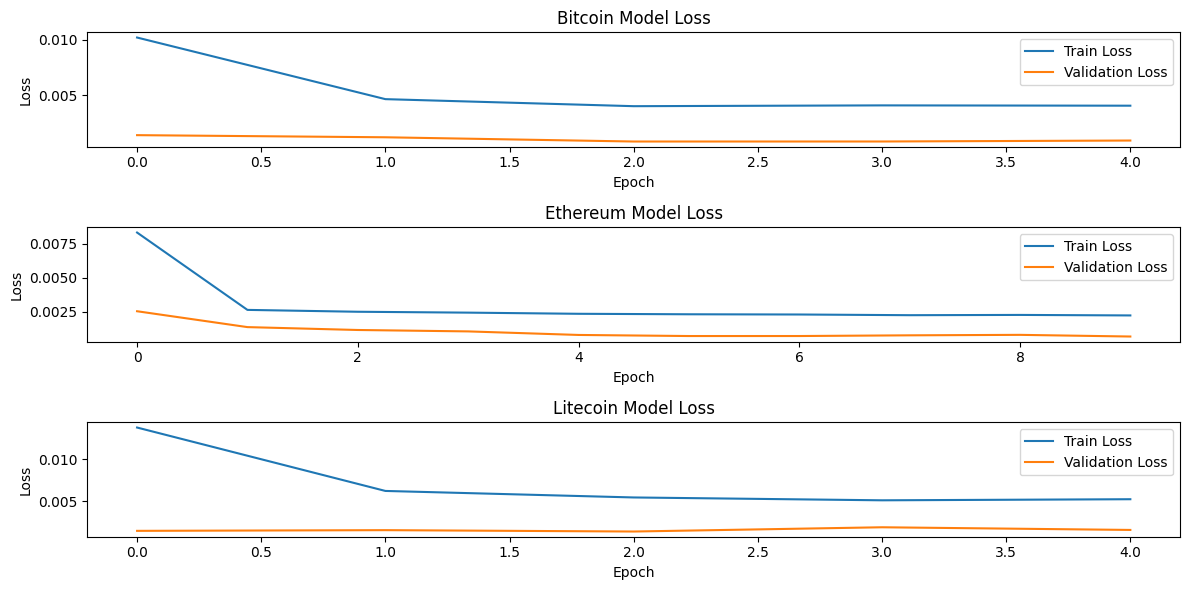

In [19]:
# Plot loss history of models
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

bitcoin_history = bitcoin_pipeline.get_history()
ethereum_history = ethereum_pipeline.get_history()
litecoin_history = litecoin_pipeline.get_history()

ax[0].plot(bitcoin_history['loss'], label='Train Loss')
ax[0].plot(bitcoin_history['val_loss'], label='Validation Loss')
ax[0].set_title('Bitcoin Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(ethereum_history['loss'], label='Train Loss')
ax[1].plot(ethereum_history['val_loss'], label='Validation Loss')
ax[1].set_title('Ethereum Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

ax[2].plot(litecoin_history['loss'], label='Train Loss')
ax[2].plot(litecoin_history['val_loss'], label='Validation Loss')
ax[2].set_title('Litecoin Model Loss')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
ax[2].legend()

plt.tight_layout()
plt.show()

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


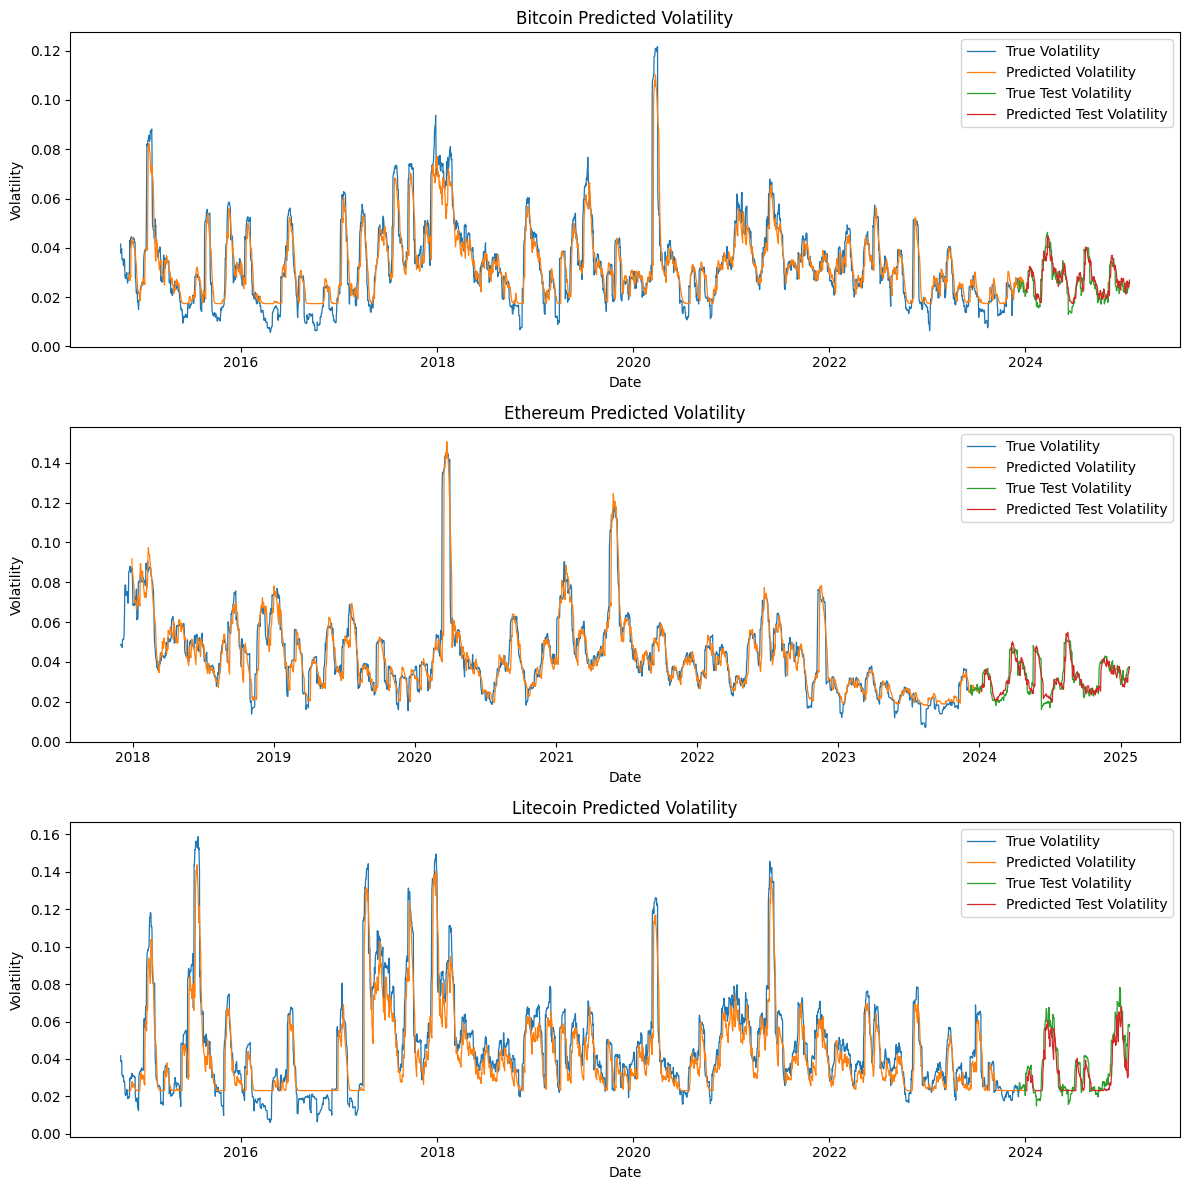

In [20]:
def predict_and_plot(pipeline, train_data, test_data, ax, title):
    # keep only t+5 predictions
    y_pred_train = pipeline.predict(train_data[features].values)[:, 4]
    y_pred_test = pipeline.predict(test_data[features].values)[:, 4]
    
    ax.plot(train_data["Date"], train_data["Volatility"], label="True Volatility", linewidth=0.9)
    ax.plot(train_data["Date"][-len(y_pred_train):], y_pred_train, label="Predicted Volatility",  linewidth=0.9)
    ax.plot(test_data["Date"], test_data["Volatility"], label="True Test Volatility",  linewidth=0.9)
    ax.plot(test_data["Date"][-len(y_pred_test):], y_pred_test, label="Predicted Test Volatility",  linewidth=0.9)
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Volatility")
    ax.legend()
    return y_pred_train, y_pred_test

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

y_pred_bitcoin_train, y_pred_bitcoin_test = predict_and_plot(bitcoin_pipeline, bitcoin_train_data, bitcoin_test_data, ax[0], "Bitcoin Predicted Volatility")
y_pred_ethereum_train, y_pred_ethereum_test = predict_and_plot(ethereum_pipeline, ethereum_train_data, ethereum_test_data, ax[1], "Ethereum Predicted Volatility")
y_pred_litecoin_train, y_pred_litecoin_test = predict_and_plot(litecoin_pipeline, litecoin_train_data, litecoin_test_data, ax[2], "Litecoin Predicted Volatility")

plt.tight_layout()
plt.show()

# Risk-Parity Portfolio

In [21]:
y_pred_all_currency = pd.DataFrame({"bitcoin": y_pred_bitcoin_test.flatten(), "ethereum": y_pred_ethereum_test.flatten(), "litecoin": y_pred_litecoin_test.flatten()})
portfolio_constructor = PortfolioConstructor(volatility_time_series=y_pred_all_currency)

In [22]:
weights = portfolio_constructor.risk_parity_weights_simple()

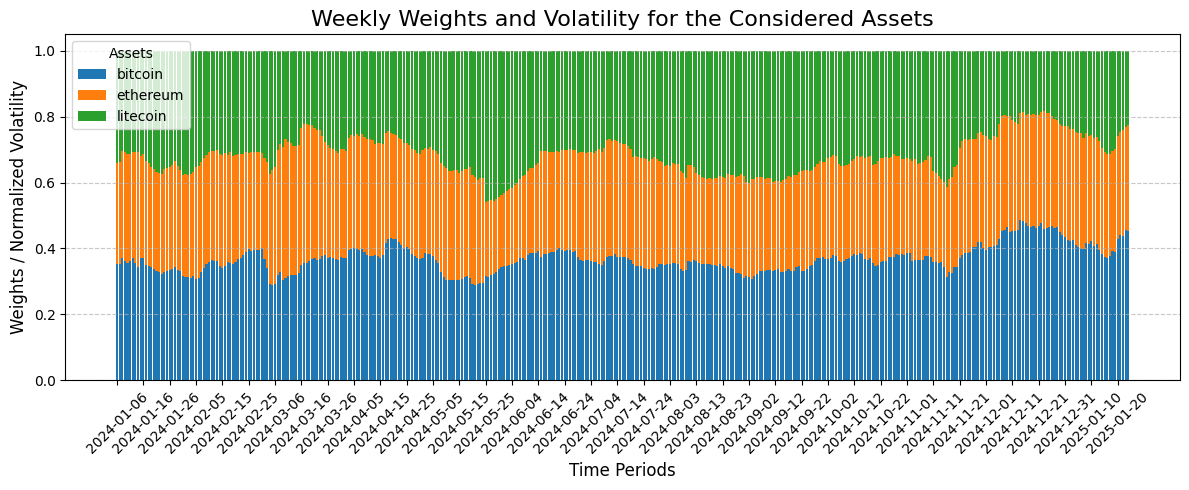

In [23]:
# Conversion en DataFrame pour faciliter le traçage
weights_df = pd.DataFrame(weights, columns=y_pred_all_currency.columns)

# Création du graphique
plt.figure(figsize=(12, 5))

# Tracer chaque colonne comme une barre empilée
bottom_values = np.zeros(len(weights))  # Initialisation des bases pour les barres empilées
for column in weights_df.columns:
    plt.bar(weights_df.index, weights_df[column], bottom=bottom_values, label=column)
    bottom_values += weights_df[column]


# Configuration du graphique
plt.title("Weekly Weights and Volatility for the Considered Assets", fontsize=16)
plt.xlabel("Time Periods", fontsize=12)
plt.ylabel("Weights / Normalized Volatility", fontsize=12)
plt.legend(title="Assets", fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(weights_df.index[::10], bitcoin_data["Date"][-len(weights_df):].dt.strftime('%Y-%m-%d').tolist()[::10], rotation=45)
# Afficher le graphique
plt.tight_layout()
plt.show()
# Add date labels to the x-axis

# Calcul des rendements

In [24]:
bitcoin_log_returns = bitcoin_test_data["Log Returns"][-len(weights_df):].values
eth_log_returns = ethereum_test_data["Log Returns"][-len(weights_df):].values
ltc_log_returns = litecoin_test_data["Log Returns"][-len(weights_df):].values

# Rendements du portefeuille
log_returns_matrix = np.array([bitcoin_log_returns, eth_log_returns, ltc_log_returns]).T
portfolio_returns = np.sum(weights * log_returns_matrix, axis=1)

# Rendements du portefeuille équilibré
balanced_weights = np.array([1/3, 1/3, 1/3])
balanced_returns = np.sum(balanced_weights * log_returns_matrix, axis=1)

# Rendements cumulés
cumulative_portfolio_return = np.prod(1 + portfolio_returns) - 1
cumulative_balanced_return = np.prod(1 + balanced_returns) - 1

# Affichage des résultats
print(f"Rendement cumulé (portefeuille dynamique): {cumulative_portfolio_return:.2%}")
print(f"Rendement cumulé (portefeuille équilibré): {cumulative_balanced_return:.2%}")

Rendement cumulé (portefeuille dynamique): 63.09%
Rendement cumulé (portefeuille équilibré): 58.46%


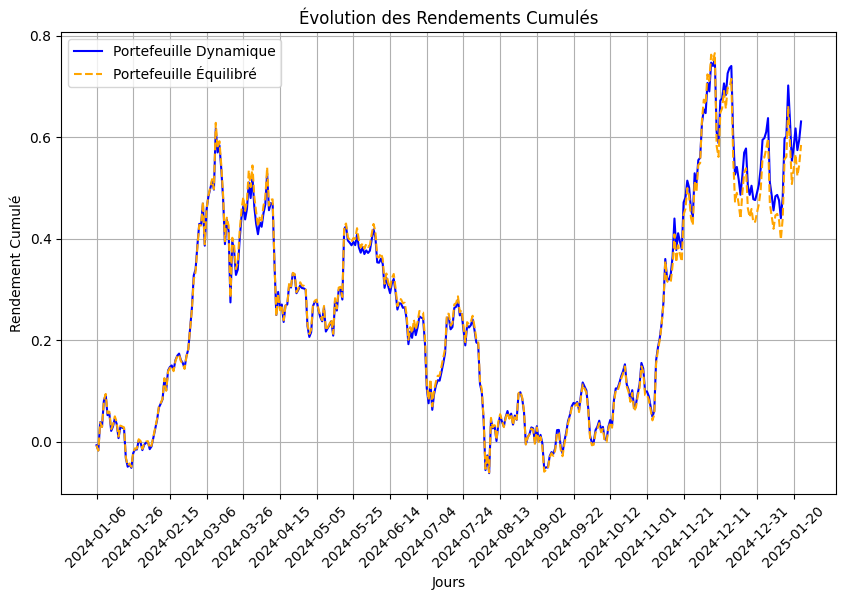

In [25]:
cumulative_portfolio_returns = np.cumprod(1 + portfolio_returns) - 1
cumulative_balanced_returns = np.cumprod(1 + balanced_returns) - 1

plt.figure(figsize=(10, 6))
plt.plot(cumulative_portfolio_returns, label="Portefeuille Dynamique", color='blue')
plt.plot(cumulative_balanced_returns, label="Portefeuille Équilibré", color='orange', linestyle='--')
plt.xticks(weights_df.index[::20], bitcoin_data["Date"][-len(weights_df):].dt.strftime('%Y-%m-%d').tolist()[::20], rotation=45)

plt.title("Évolution des Rendements Cumulés")
plt.xlabel("Jours")
plt.ylabel("Rendement Cumulé")
plt.legend()
plt.grid(True)
plt.show()

## Sauvegarde des modèles en pickle pour l'API

In [26]:
# bitcoin_pipeline.save("../api/models/bitcoin/bitcoin_TCNN.pkl")
# ethereum_pipeline.save("../api/models/ethereum/ethereum_TCNN.pkl")
# litecoin_pipeline.save("../api/models/litecoin/litecoin_TCNN.pkl")

In [27]:
# exemple de prediction
import pickle 
bitcoin_pipeline = pickle.load(open("../api/models/bitcoin/bitcoin_GRU.pkl", 'rb'))
bitcoin_pipeline.predict(bitcoin_test_data[features].values)[0:5]

FileNotFoundError: [Errno 2] No such file or directory: '../api/models/bitcoin/bitcoin_GRU.pkl'